In [1]:
import pandas as pd
import random

In [2]:
import pandas as pd

# Cargar el archivo CSV con el separador correcto

df = pd.read_csv("C:/Users/kliza/Downloads/clientes_distribuidora_1.csv", sep=";", encoding="latin1") 

# Mostrar las primeras filas para verificar
print(df.head())
print(df.columns)  # Ver los nombres de las columnas correctamente separados


   ID Cliente    Tipo Cliente Ubicacion Frecuencia Compra  \
0           1  Tienda Pequeña    Corral           Semanal   
1           2      Minimarket    Niebla           Mensual   
2           3       Panaderia  Valdivia         Quincenal   
3           4      Minimarket    Corral           Mensual   
4           5      Minimarket    Niebla         Quincenal   

   Valor unitario harina  valor uniario huevo  Volumen Harina (kg)  \
0                    840                  250                   25   
1                    840                  250                  100   
2                    840                  250                  250   
3                    840                  250                   75   
4                    840                  250                   25   

   Volumen Huevos  Ingreso Harina ($)  Ingreso Huevos ($)  Costo Harina ($)  \
0             360               21000               90000             21000   
1             540               84000              135

In [3]:
# Parámetros para la generación de datos
num_clientes = 150
tipos_cliente = ["Panadería", "Restaurante", "Minimarket", "Tienda Pequeña", "Consumidor minorista"]
ubicaciones = ["Valdivia", "Las animas", "Los molinos", "Corral", "Niebla"]
frecuencias_compra = ["Semanal", "Quincenal", "Mensual"]
metodos_pago = ["Efectivo", "Tarjeta", "Crédito"]

clientes = []
for i in range(1, num_clientes + 1):
    tipo_cliente = random.choice(tipos_cliente)
    ubicacion = random.choice(ubicaciones)
    frecuencia_compra = random.choice(frecuencias_compra)
    
    if tipo_cliente in ["Panadería", "Restaurante", "Minimarket"]:
        volumen_harina = random.randint(50, 500)  # kg
        volumen_huevos = random.randint(20, 200)  # docenas
    elif tipo_cliente == "Tienda Pequeña":
        volumen_harina = random.randint(10, 100)
        volumen_huevos = random.randint(5, 50)
    else:  # Consumidor Final
        volumen_harina = random.randint(1, 10)
        volumen_huevos = random.randint(1, 5)
    
    gasto_promedio = round((volumen_harina * 840) + (volumen_huevos *267), 0)  # Precio estimado por kg/docena
    metodo_pago = random.choice(metodos_pago)
    
    clientes.append([i, tipo_cliente, ubicacion, frecuencia_compra, volumen_harina, volumen_huevos, gasto_promedio, metodo_pago])

# Crear DataFrame
df_clientes = pd.DataFrame(clientes, columns=[
    "ID Cliente", "Tipo Cliente", "Ubicación", "Frecuencia Compra", 
    "Volumen Harina (kg)", "Volumen Huevos (docenas)", "Gasto Promedio ($)", "Método de Pago"
])

# Guardar como CSV
df_clientes.to_csv("clientes_distribuidora.csv", index=False)

# Mostrar las primeras filas del archivo generado
df_clientes.head()


,ID Cliente,Tipo Cliente,Ubicación,Frecuencia Compra,Volumen Harina (kg),Volumen Huevos (docenas),Gasto Promedio ($),Método de Pago
0,1,Restaurante,Corral,Semanal,187,115,187785,Tarjeta
1,2,Restaurante,Las animas,Mensual,107,53,104031,Crédito
2,3,Tienda Pequeña,Niebla,Mensual,49,50,54510,Crédito
3,4,Panadería,Corral,Mensual,120,33,109611,Crédito
4,5,Consumidor minorista,Valdivia,Mensual,7,1,6147,Crédito


In [4]:
df["Ganancia ($)"] = (df["Ingreso Harina ($)"] + df["Ingreso Huevos ($)"]) - (df["Costo Harina ($)"] + df["Costo Huevos ($)"])

print(df.head())

df.to_excel("archivo_con_ganancia.xlsx", index=False)

   ID Cliente    Tipo Cliente Ubicacion Frecuencia Compra  \
0           1  Tienda Pequeña    Corral           Semanal   
1           2      Minimarket    Niebla           Mensual   
2           3       Panaderia  Valdivia         Quincenal   
3           4      Minimarket    Corral           Mensual   
4           5      Minimarket    Niebla         Quincenal   

   Valor unitario harina  valor uniario huevo  Volumen Harina (kg)  \
0                    840                  250                   25   
1                    840                  250                  100   
2                    840                  250                  250   
3                    840                  250                   75   
4                    840                  250                   25   

   Volumen Huevos  Ingreso Harina ($)  Ingreso Huevos ($)  Costo Harina ($)  \
0             360               21000               90000             21000   
1             540               84000              135

### Agrupar ventas por Frecuencia de Compra

In [5]:
df.rename(columns={
    'Volumen Huevos': 'Volumen Huevos (u)'
}, inplace=True)


In [6]:
# Calcular ingresos
df["Ingreso Harina ($)"] = df["Volumen Harina (kg)"] * 840
df["Ingreso Huevos ($)"] = df["Volumen Huevos (u)"] * 267
df["Ingreso Total ($)"] = df["Ingreso Harina ($)"] + df["Ingreso Huevos ($)"]

# Agrupar por tipo de cliente, ubicación y frecuencia
ventas_freq = df.groupby(["Tipo Cliente", "Ubicacion", "Frecuencia Compra"])["Ingreso Total ($)"].sum().reset_index()

# Calcular porcentaje por grupo
total_ventas = ventas_freq.groupby(["Tipo Cliente", "Ubicacion"])["Ingreso Total ($)"].transform("sum")
ventas_freq["Porcentaje (%)"] = round((ventas_freq["Ingreso Total ($)"] / total_ventas) * 100, 2)

# Ver resultados
ventas_freq.sort_values(["Tipo Cliente", "Ubicacion", "Frecuencia Compra"], inplace=True)
ventas_freq


,Tipo Cliente,Ubicacion,Frecuencia Compra,Ingreso Total ($),Porcentaje (%)
0,Consumidor minorista,Corral,Mensual,130500,53.18
1,Consumidor minorista,Corral,Quincenal,40440,16.48
2,Consumidor minorista,Corral,Semanal,74430,30.33
3,Consumidor minorista,Las animas,Mensual,186570,67.44
4,Consumidor minorista,Las animas,Quincenal,37020,13.38
...,...,...,...,...,...
59,Tienda Pequeña,Niebla,Quincenal,192240,47.41
60,Tienda Pequeña,Niebla,Semanal,213240,52.59
61,Tienda Pequeña,Valdivia,Mensual,468480,34.74
62,Tienda Pequeña,Valdivia,Quincenal,666780,49.45


In [7]:
print(df.head())

   ID Cliente    Tipo Cliente Ubicacion Frecuencia Compra  \
0           1  Tienda Pequeña    Corral           Semanal   
1           2      Minimarket    Niebla           Mensual   
2           3       Panaderia  Valdivia         Quincenal   
3           4      Minimarket    Corral           Mensual   
4           5      Minimarket    Niebla         Quincenal   

   Valor unitario harina  valor uniario huevo  Volumen Harina (kg)  \
0                    840                  250                   25   
1                    840                  250                  100   
2                    840                  250                  250   
3                    840                  250                   75   
4                    840                  250                   25   

   Volumen Huevos (u)  Ingreso Harina ($)  Ingreso Huevos ($)  \
0                 360               21000               96120   
1                 540               84000              144180   
2                

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

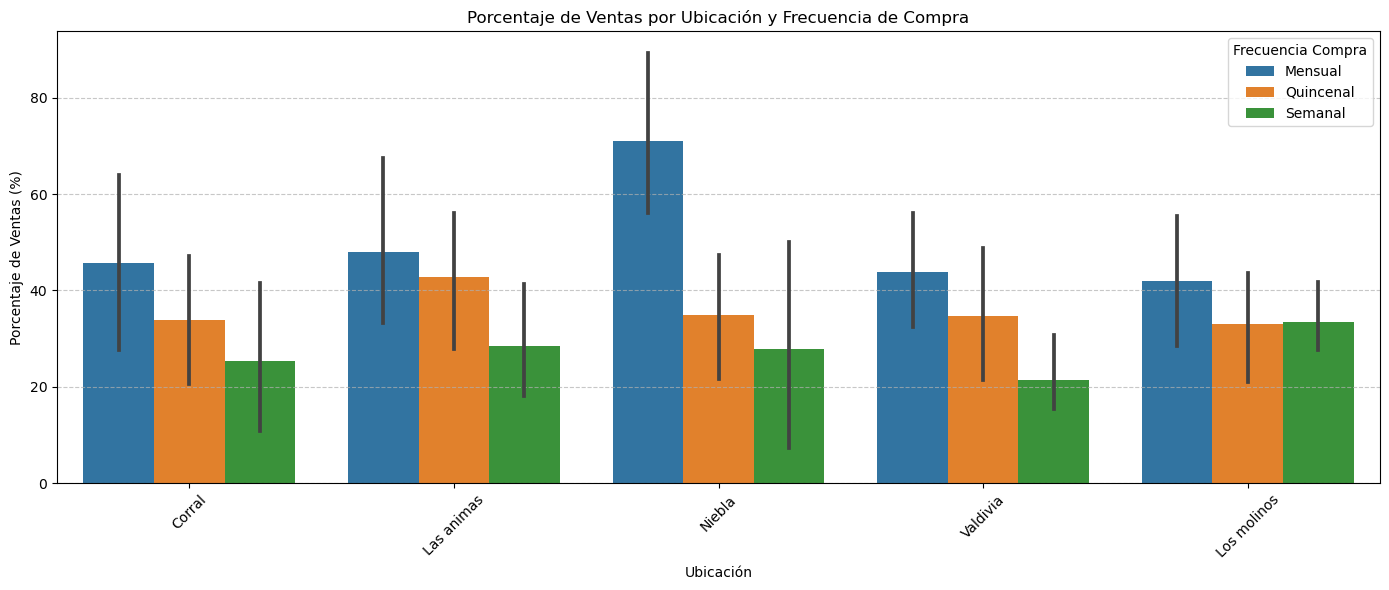

In [10]:
ventas = df.groupby(["Tipo Cliente", "Ubicacion", "Frecuencia Compra"])["Ingreso Total ($)"].sum().reset_index()
ventas["Total General"] = ventas.groupby(["Tipo Cliente", "Ubicacion"])["Ingreso Total ($)"].transform("sum")
ventas["Porcentaje (%)"] = round((ventas["Ingreso Total ($)"] / ventas["Total General"]) * 100, 2)

# Gráfico
plt.figure(figsize=(14, 6))
sns.barplot(data=ventas, x="Ubicacion", y="Porcentaje (%)", hue="Frecuencia Compra")
plt.title("Porcentaje de Ventas por Ubicación y Frecuencia de Compra")
plt.ylabel("Porcentaje de Ventas (%)")
plt.xlabel("Ubicación")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

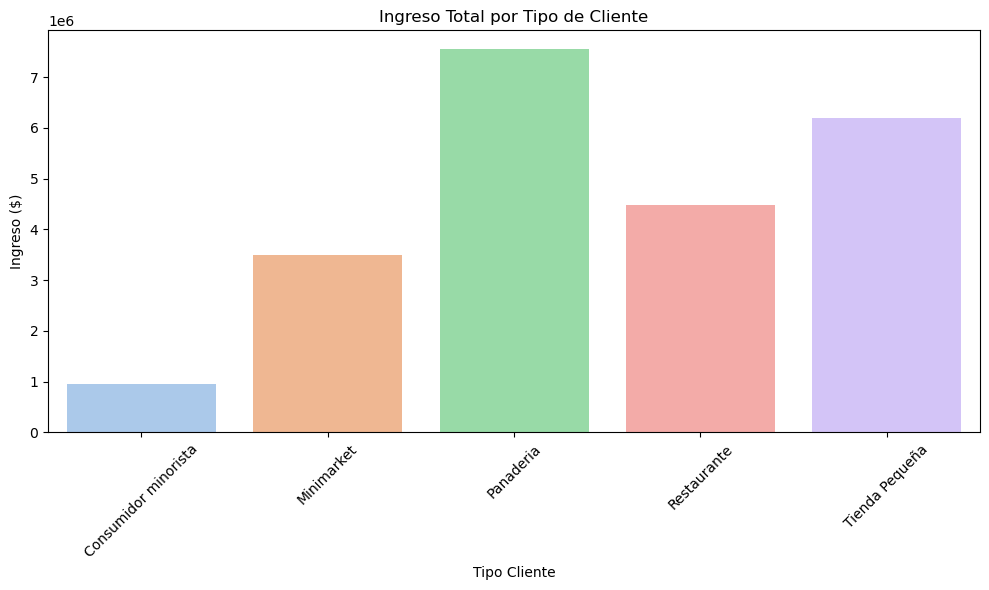

In [11]:
ventas_por_tipo = df.groupby("Tipo Cliente")[["Ingreso Harina ($)", "Ingreso Huevos ($)"]].sum().reset_index()
ventas_por_tipo["Ingreso Total"] = ventas_por_tipo["Ingreso Harina ($)"] + ventas_por_tipo["Ingreso Huevos ($)"]

plt.figure(figsize=(10,6))
sns.barplot(data=ventas_por_tipo, x="Tipo Cliente", y="Ingreso Total", palette="pastel")
plt.title("Ingreso Total por Tipo de Cliente")
plt.ylabel("Ingreso ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


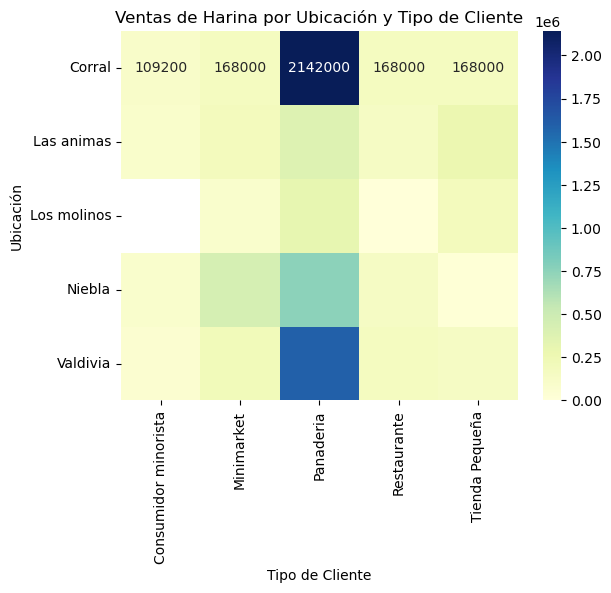

In [12]:
pivot = df.pivot_table(values="Ingreso Harina ($)", index="Ubicacion", columns="Tipo Cliente", aggfunc="sum")
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Ventas de Harina por Ubicación y Tipo de Cliente")
plt.ylabel("Ubicación")
plt.xlabel("Tipo de Cliente")
plt.show()


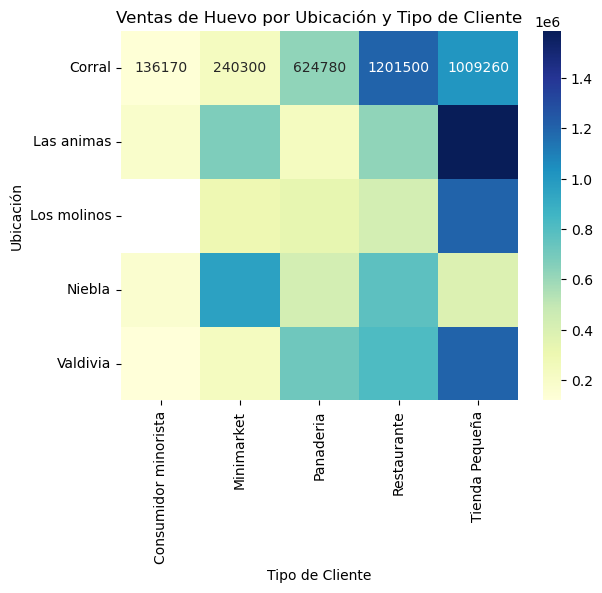

In [13]:
pivot = df.pivot_table(values="Ingreso Huevos ($)", index="Ubicacion", columns="Tipo Cliente", aggfunc="sum")
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Ventas de Huevo por Ubicación y Tipo de Cliente")
plt.ylabel("Ubicación")
plt.xlabel("Tipo de Cliente")
plt.show()


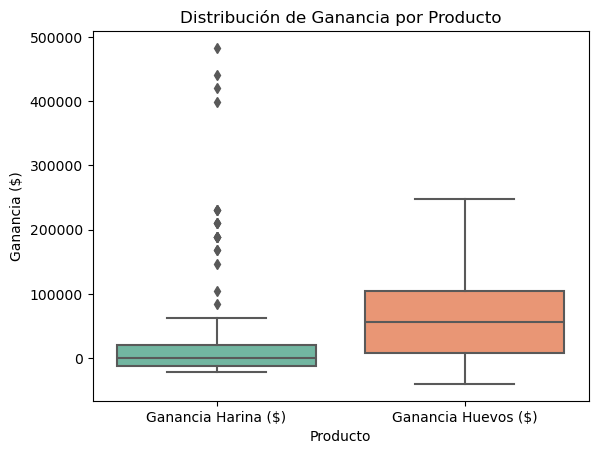

In [14]:
df["Ganancia Harina ($)"] = df["Ingreso Harina ($)"] - df["Costo Harina ($)"]
df["Ganancia Huevos ($)"] = df["Ingreso Huevos ($)"] - df["Costo Huevos ($)"]

ganancias = df.melt(id_vars=["ID Cliente"], 
                    value_vars=["Ganancia Harina ($)", "Ganancia Huevos ($)"],
                    var_name="Producto", value_name="Ganancia")

sns.boxplot(data=ganancias, x="Producto", y="Ganancia", palette="Set2")
plt.title("Distribución de Ganancia por Producto")
plt.ylabel("Ganancia ($)")
plt.show()
